# Multimodal Use Case

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from utils import load_env
load_env()

In [7]:
import os

# Replace 'YOUR_ENV_VAR' with the name of your environment variable
env_var_value = os.getenv('TOGETHER_API_KEY')

if env_var_value is not None:
    #print(f"Environment variable value: {env_var_value}")
    print(f"Environment variable value IS SET!!!")
else:
    print("Environment variable is not set.")

Environment variable value IS SET!!!


## Load helper functions

In [8]:
from utils import llama32

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>utils.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

In [9]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [10]:
def llama32pi(prompt, image_url, model_size=90):
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text",
          "text": prompt},
        {"type": "image_url",
          "image_url": {
            "url": image_url}
        }
      ]
    },
  ]

  result = llama32(messages, model_size)
  return result

## OCR with receipts

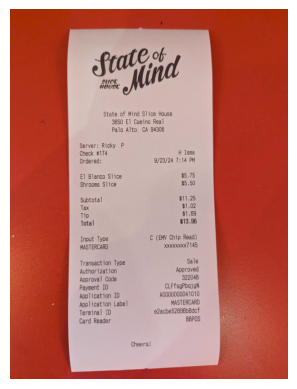

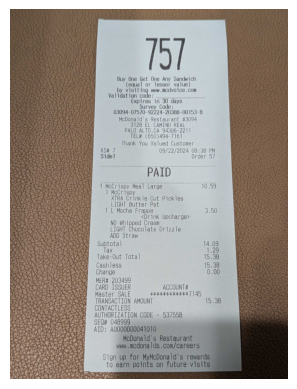

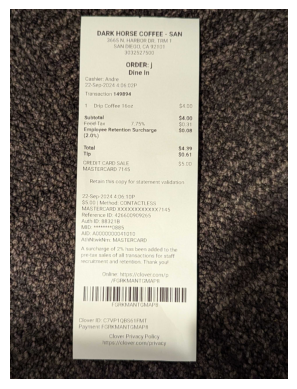

In [11]:
from utils import disp_image
for i in range(1, 4):
  disp_image(f"images/receipt-{i}.jpg")

In [14]:
question = "What's the total charge in the receipt?"
results = ""
for i in range(1, 4):
    base64_image = encode_image(f"images/receipt-{i}.jpg")
    res = llama32pi(question, f"data:image/jpeg;base64,{base64_image}")
    results = results + f"{res}\n"
print(results)

The total charge in the receipt is $13.96.
The total charge in the receipt is $15.38.
The total charge in the receipt is $4.39.



In [15]:
messages = [
    {"role": "user",
     "content": f"""What's the total charge of all the recipts below?
{results}"""
  }
]

In [16]:
response = llama32(messages)
print(response)

To find the total charge of all the receipts, I'll add up the charges:

$13.96 + $15.38 = $29.34
$29.34 + $4.39 = $33.73

The total charge of all the receipts is $33.73.


## Handling multiple images

Image 1 dimensions: 1920 2560
Image 2 dimensions: 1920 2560
Image 3 dimensions: 1920 2560
Merged image dimensions: (5760, 2560)


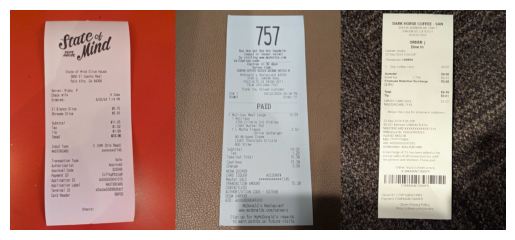

In [17]:
from utils import merge_images
import matplotlib.pyplot as plt
merged_image = merge_images("images/receipt-1.jpg",
                            "images/receipt-2.jpg",
                            "images/receipt-3.jpg")
plt.imshow(merged_image)
plt.axis('off')
plt.show()

In [18]:
from utils import resize_image
resized_img = resize_image(merged_image)

Original size: 5760 x 2560
New size: 1120 x 497


In [19]:
base64_image = encode_image("images/resized_image.jpg")
question = "What's the total charge of all the recipts below?"
result = llama32pi(question,
                      f"data:image/jpeg;base64,{base64_image}")
print(result)

To find the total charge of all the receipts, we need to add up the amounts listed on each receipt.

**Receipt 1: State of Mind Slice House**

* Subtotal: $11.25
* Tax: $1.02
* Tip: $1.68
* Total: $13.95

**Receipt 2: McDonald's**

* Subtotal: $14.09
* Tax: $1.29
* Total: $15.38

**Receipt 3: Dark Horse Coffee**

* Subtotal: $4.00
* Tax: $0.08
* Total: $4.08

Now, let's add up the totals from each receipt:

$13.95 + $15.38 + $4.08 = **$33.41**

Therefore, the total charge of all the receipts is $33.41.


## Choosing the right drink

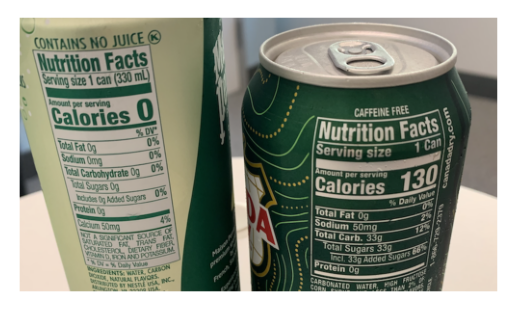

In [20]:
disp_image("images/drinks.png")

In [21]:
question = "I am on a diet. Which drink should I drink?"

In [22]:
base64_image = encode_image("images/drinks.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

**Comparing the Nutritional Content of Two Drinks**

To determine which drink is more suitable for your diet, let's compare the nutritional content of the two options.

**Drink 1:**

* Calories: 0
* Fat: 0g
* Sodium: 0mg
* Carbohydrates: 0g
* Sugars: 0g
* Protein: 0g

**Drink 2:**

* Calories: 130
* Fat: 0g
* Sodium: 50mg
* Carbohydrates: 33g
* Sugars: 33g
* Protein: 0g

Based on the nutritional information, **Drink 1** appears to be the better choice for your diet. It contains zero calories, fat, sodium, carbohydrates, sugars, and protein, making it a very low-calorie and low-nutrient beverage. In contrast, **Drink 2** contains 130 calories, 50mg of sodium, 33g of carbohydrates, and 33g of sugars, making it a higher-calorie and higher-sugar beverage.

Therefore, if you are on a diet and looking to reduce your calorie and sugar intake, **Drink 1** would be the better choice. However, it's important to note that both drinks are likely to be highly processed and may not provide any signi

In [23]:
question = ("Generete nurtrition facts of the two drinks " 
            "in JSON format for easy comparison.")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

Here are the nutrition facts of the two drinks in JSON format for easy comparison:

**Drink 1 (Left Can)**

```json
{
  "Serving Size": "1 can (330 mL)",
  "Calories": 0,
  "Total Fat": 0g,
  "Sodium": 0mg,
  "Total Carbohydrate": 0g,
  "Total Sugars": 0g,
  "Protein": 0g
}
```

**Drink 2 (Right Can)**

```json
{
  "Serving Size": "1 can",
  "Calories": 130,
  "Total Fat": 0g,
  "Sodium": 50mg,
  "Total Carb": 33g,
  "Total Sugars": 33g,
  "Protein": 0g
}
```

Note that the serving sizes are different between the two drinks, with Drink 1 being 330 mL and Drink 2 being 1 can (no specific volume listed). This may affect the comparison of the nutrition facts.


## Understanding Llama MM model with code implementation

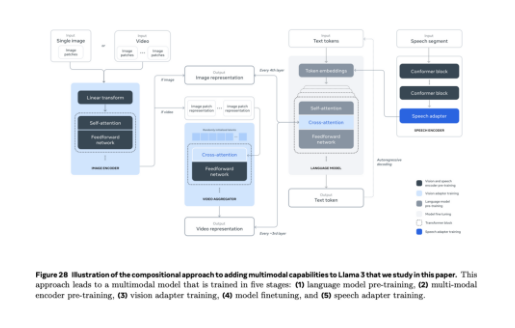

In [24]:
disp_image("images/llama32mm.png")

In [25]:
question = ("I see this diagram in the Llama 3 paper. "
            "Summarize the flow in text and then return a "
            "python script that implements the flow.")
base64_image = encode_image("images/llama32mm.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

The diagram illustrates the compositional approach to adding multimodal capabilities to Llama 3. The approach involves training a multimodal model in five stages:

1. Language model pre-training
2. Multi-modal encoder pre-training
3. Vision adapter training
4. Model fine-tuning
5. Speech adapter training

Here is a Python script that implements the flow:

```python
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Stage 1: Language model pre-training
class LanguageModel(nn.Module):
    def __init__(self):
        super(LanguageModel, self).__init__()
        self.model = AutoModelForSequenceClassification.from_pretrained('llama-3')
        self.tokenizer = AutoTokenizer.from_pretrained('llama-3')

    def forward(self, input_ids):
        outputs = self.model(input_ids)
        return outputs

# Stage 2: Multi-modal encoder pre-training
class MultiModalEncoder(nn.Module):
    def __init__(self):


## Llama 3.1 70B Instruct model speed

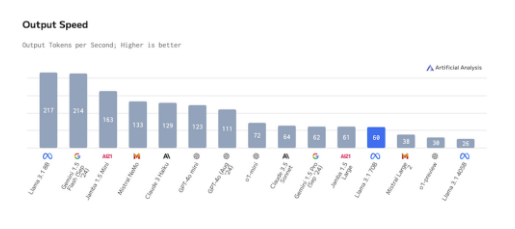

In [26]:
disp_image("images/llama31speed.png")

In [27]:
question = "Convert the chart to an HTML table."
base64_image = encode_image("images/llama31speed.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

The chart displays the output speed of various models, measured in output tokens per second. The data is presented in a bar graph format, with the model names listed on the x-axis and the output speed values on the y-axis.

To convert this chart to an HTML table, we can create a table structure with the model names as column headers and the output speed values as data cells. Here is the resulting HTML table:

<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>Output Speed (tokens/second)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Llama 2 1.5B</td>
      <td>217</td>
    </tr>
    <tr>
      <td>LLaMA 2 7B</td>
      <td>214</td>
    </tr>
    <tr>
      <td>LLaMA 2 13B</td>
      <td>163</td>
    </tr>
    <tr>
      <td>LLaMA 2 70B</td>
      <td>133</td>
    </tr>
    <tr>
      <td>LLaMA 2 175B</td>
      <td>129</td>
    </tr>
    <tr>
      <td>LLaMA 2 350B</td>
      <td>123</td>
    </tr>
    <tr>
      <td>LLaMA 2 1T</td>
      <td>111</td>
    </tr>
    <tr>

In [28]:
from IPython.display import HTML
minified_html_table = "<table><thead><tr><th>Model</th><th>Output Tokens per Second</th></tr></thead><tbody><tr><td>Llama 2 1.5B</td><td>217</td></tr><tr><td>Google's PaLM 2 540B</td><td>214</td></tr><tr><td>Google's PaLM 2 540B</td><td>163</td></tr><tr><td>Meta's LLaMA 2 70B</td><td>133</td></tr><tr><td>Meta's LLaMA 2 70B</td><td>129</td></tr><tr><td>Google's T5 3.5B</td><td>123</td></tr><tr><td>OPT-6B</td><td>111</td></tr><tr><td>OPT-6B</td><td>75</td></tr><tr><td>ChatGPT-3.5</td><td>64</td></tr><tr><td>Google's T5 3.5B</td><td>62</td></tr><tr><td>Google's T5 3.5B</td><td>61</td></tr><tr><td>Meta's LLaMA 2 7B</td><td>68</td></tr><tr><td>Meta's LLaMA 2 7B</td><td>38</td></tr><tr><td>Meta's LLaMA 2 7B</td><td>38</td></tr><tr><td>Meta's LLaMA 2 7B</td><td>25</td></tr></tbody></table>"
HTML(minified_html_table)

Model,Output Tokens per Second
Llama 2 1.5B,217
Google's PaLM 2 540B,214
Google's PaLM 2 540B,163
Meta's LLaMA 2 70B,133
Meta's LLaMA 2 70B,129
Google's T5 3.5B,123
OPT-6B,111
OPT-6B,75
ChatGPT-3.5,64
Google's T5 3.5B,62


## Know your fridge

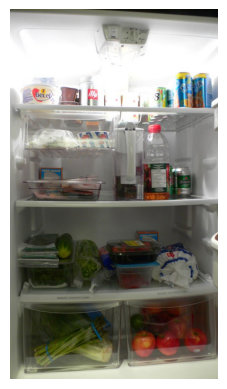

In [29]:
disp_image("images/fridge-3.jpg")

In [30]:
question = ("What're in the fridge? What kind of food can be made? Give "
            "me 2 examples, based on only the ingredients in the fridge.")
base64_image = encode_image("images/fridge-3.jpg")
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

The fridge contains a variety of ingredients, including vegetables such as cucumbers, lettuce, and tomatoes, as well as fruits like apples. There are also beverages like juice and soda, and dairy products like yogurt and cheese. Additionally, there are condiments like ketchup and mustard, and snacks like crackers and chips.

With these ingredients, two possible dishes that can be prepared are:

1. A fresh salad with cucumbers, lettuce, and tomatoes, topped with a vinaigrette dressing made from the condiments.
2. A fruit platter with sliced apples, accompanied by a dollop of yogurt and a sprinkle of granola for added crunch.

These dishes showcase the versatility of the ingredients in the fridge and can be easily prepared using the available items.


### Asking a follow up question

In [31]:
new_question = "is there banana in the fridge? where?"
messages = [
  {"role": "user", "content": [
      {"type": "text", "text": question},
      {"type": "image_url", "image_url": {"url": f"data:image/jpg;base64,{base64_image}"}}
  ]},
  {"role": "assistant", "content": result},
  {"role": "user", "content": new_question}
]
result = llama32(messages)
print(result)

There are no bananas in the fridge. The only fruit visible in the fridge is apples, which are located in the bottom right drawer.


In [32]:
def llama32repi(question, image_url, result, new_question, model_size=90):
    messages = [
      {"role": "user", "content": [
          {"type": "text", "text": question},
          {"type": "image_url", "image_url": {"url": image_url}}
      ]},
      {"role": "assistant", "content": result},
      {"role": "user", "content": new_question}
    ]
    result = llama32(messages, model_size)
    return result

## Interior Design Assistant

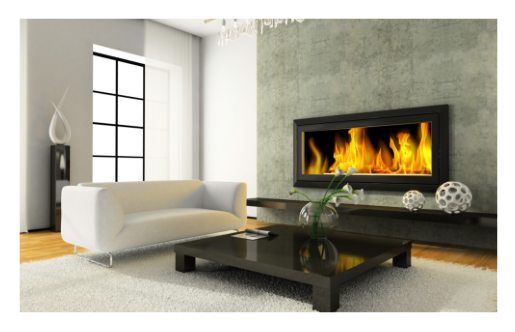

In [33]:
disp_image("images/001.jpeg")

In [34]:
question = ("Describe the design, style, color, material and other "
            "aspects of the fireplace in this photo. Then list all "
            "the objects in the photo.")
base64_image = encode_image("images/001.jpeg")
result = llama32pi(question, f"data:image/jpeg;base64,{base64_image}")
print(result)

The fireplace in the photo is a modern, sleek design with a rectangular shape and a black frame. The firebox is made of glass, allowing for a clear view of the flames. The fireplace is mounted on a wall, which appears to be made of concrete or stone, adding an industrial touch to the room.

The fireplace is surrounded by a minimalist decor, with a few decorative objects placed on the shelf below it. The overall aesthetic of the fireplace is one of simplicity and elegance, making it a focal point in the room.

Here is a list of all the objects in the photo:

* Fireplace
* Coffee table
* Sofa
* Rug
* Vase
* Decorative objects (on the shelf below the fireplace)
* Window
* Door
* Wall art (hanging on the wall behind the sofa)

Note: The objects are listed in no particular order, and some may be partially obscured by other objects in the photo.


In [35]:
new_question = ("How many balls and vases are there? Which one is closer "
                "to the fireplace: the balls or the vases?")
res = llama32repi(question, f"data:image/jpeg;base64,{base64_image}", result, new_question)
print(res)

There are two balls and two vases in the photo. The balls are closer to the fireplace than the vases.


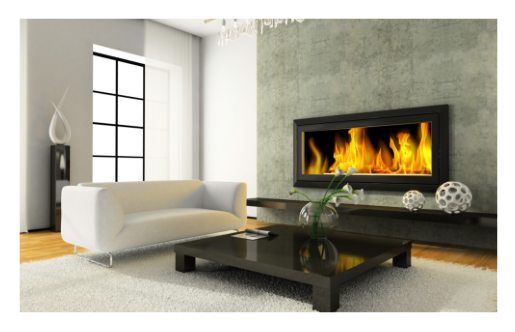

In [36]:
disp_image("images/001.jpeg")

## Math grader


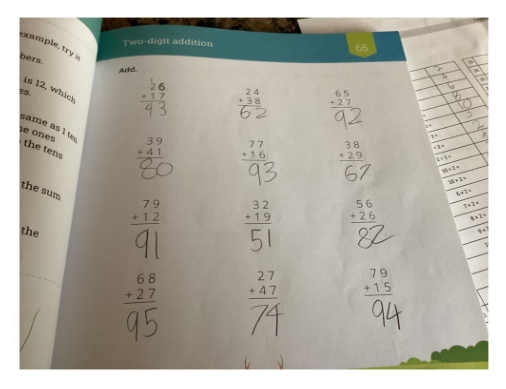

In [37]:
disp_image("images/math_hw3.jpg")

In [38]:
prompt = ("Check carefully each answer in a kid's math homework, first "
          "do the calculation, then compare the result with the kid's "
          "answer, mark correct or incorrect for each answer, and finally"
          " return a total score based on all the problems answered.")
base64_image = encode_image("images/math_hw3.jpg")
result = llama32pi(prompt, f"data:image/jpg;base64,{base64_image}")
print(result)

**Step 1: Calculate the correct answer for each problem**

*   Problem 1: 26 + 17 = 43
*   Problem 2: 24 + 38 = 62
*   Problem 3: 65 + 27 = 92
*   Problem 4: 39 + 41 = 80
*   Problem 5: 77 + 16 = 93
*   Problem 6: 38 + 29 = 67
*   Problem 7: 79 + 12 = 91
*   Problem 8: 32 + 19 = 51
*   Problem 9: 56 + 26 = 82
*   Problem 10: 68 + 27 = 95
*   Problem 11: 27 + 47 = 74
*   Problem 12: 79 + 15 = 94

**Step 2: Compare the calculated answers with the kid's answers and mark them as correct or incorrect**

*   Problem 1: Correct
*   Problem 2: Correct
*   Problem 3: Correct
*   Problem 4: Correct
*   Problem 5: Correct
*   Problem 6: Correct
*   Problem 7: Correct
*   Problem 8: Correct
*   Problem 9: Correct
*   Problem 10: Correct
*   Problem 11: Correct
*   Problem 12: Correct

**Step 3: Calculate the total score**

Total score = Number of correct answers / Total number of problems

Total score = 12 / 12

Total score = 1

**Answer**: The kid scored 1 out of 12, which means they got all 12 p

## Tool calling with image

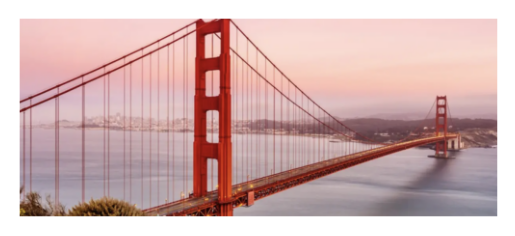

In [39]:
disp_image("images/golden_gate.png")

In [40]:
question = ("Where is the location of the place shown in the picture?")
base64_image = encode_image("images/golden_gate.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

The location of the place shown in the picture is San Francisco, California. The Golden Gate Bridge is an iconic suspension bridge that spans the Golden Gate strait, which is the opening of San Francisco Bay into the Pacific Ocean. It connects the city of San Francisco to Marin County, California. The bridge is a prominent landmark and a symbol of San Francisco and the West Coast of the United States.


In [41]:
weather_question = ("What is the current weather in the location "
                 "mentioned in the text below: \n"  f"{result}")
print(weather_question)

What is the current weather in the location mentioned in the text below: 
The location of the place shown in the picture is San Francisco, California. The Golden Gate Bridge is an iconic suspension bridge that spans the Golden Gate strait, which is the opening of San Francisco Bay into the Pacific Ocean. It connects the city of San Francisco to Marin County, California. The bridge is a prominent landmark and a symbol of San Francisco and the West Coast of the United States.


In [42]:
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%d %B %Y")

messages = [
    {"role": "system",
     "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
Today Date: {formatted_date}
"""},
    {"role": "user",
     "content": weather_question}
  ]
print(llama32(messages))

<|python_tag|>brave_search.call(query="current weather in San Francisco, California")
